In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Getting the Data

In [2]:
import csv
import urllib.request as urllib2
from collections import namedtuple

# Create a namedtuple constructor for each record in the Iris data
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris-setosa
#       -- Iris-versicolour
#       -- Iris-virginica
fields = ('sepal_length', 
          'sepal_width', 
          'petal_length', 
          'petal_width', 
          'species')
IrisRecord = namedtuple('IrisRecord', fields)

# Download and read in the data from the UCI Machine Learning Repository
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
iris_data_csv = response.read().decode('utf-8').strip()

# Convert each record into a format that's easier to work with (i.e.,
# wrap each record in the namedtuple that we created).
data = []
for row in csv.reader(iris_data_csv.splitlines()):
    data.append(IrisRecord(
        sepal_length          = float(row[0]),
        sepal_width           = float(row[1]),
        petal_length          = float(row[2]),
        petal_width           = float(row[3]),
        species               = row[4]))

## Creating a Parallel Coordinates Function

In [3]:
from itertools import cycle
from collections import defaultdict

def parallelcoords(m, target=True):
    """Plots parallel coordinates from a 2D matrix of numerical data
    """ 
    # Create a color map of species names to colors
    color_cycler = cycle(plt.rcParams['axes.prop_cycle'])
    cmap = defaultdict(lambda: next(color_cycler)['color'])
        
    # Plot the data, one line for each record in the data set.
    # Remember calling plot continuously works because pyplot
    # keeps track of the current figure and adds a new line
    # to the current figure every time you call plot.
    for record in m:
        # If the data contains a target variable, plot only the features
        # and use the target variable to determine the color of the line
        if target:
            plt.plot(record[:-1], c=cmap[record[-1]])
        else:
            plt.plot(record)

    # Label the x-axis with the name of each feature in the data set.
    try:
        # If each record is a namedtuple, get the list of fields;
        # we'll use those for the x- and y-axis labels of the 
        # scatterplot matrix. If target is True, don't get the
        # last field name.
        features = m[0]._fields[:-1] if target else m[0]._fields 
    except:
        features = range(len(m[0]) - 1) if target else range(len(m[0]))
    plt.xticks(range(len(features)), features)

    # Grab the y-axis from the current Axes object so we can hide the 
    # origin label since it looks a little crowded otherwise.
    plt.gca().yaxis.get_major_ticks()[0].set_visible(False)

    # Show the grid lines for the x-axis
    plt.grid(axis='x')

    # If we have a target variable in the data, create a legend
    # with an entry for each class in the target variable.
    if target:
        # Get the list of classes for the target variable
        classes = list(set(r[-1] for r in m))

        # Create a few "proxy artists" for creating the legend. Calling the 
        # legend() function without passing in any parameters will create a
        # legend for any labeled data in the graph, so we could do something
        # funky where we add a label for one line per species, but that 
        # doesn't seem as simple and clean as just creating a few lines that
        # we use just to create the legend. Plus, this is an officially 
        # sanctioned way to create a legend (just see the legend docs).
        legend_handles = [plt.Line2D([], [], color=cmap[cls], label=cls) for cls in classes]
        plt.legend(handles=legend_handles);

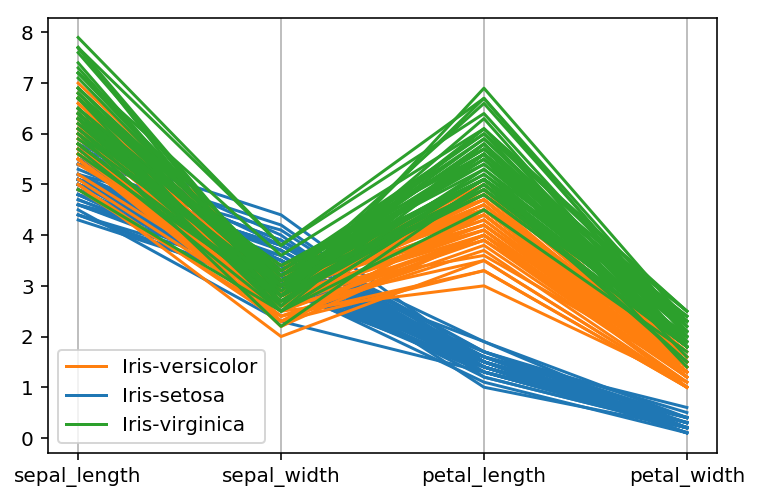

In [4]:
parallelcoords(data)